---
## Cairo University Faculty of Engineering
### ML for Bio Robotics 2024
### Task 2
#### Team 8
---

**In This Task :**
- We implement KNN, and Radius Nearest Neighbor algorithm on Prostate Cancer Predictions dataset using both (Scikit-learn and Python form scratch implementation).
- We apply all needed data preparation, and data analysis.
- We use accuracy as an evaluation matrix for both models 
- We compare the results before and after data processing for both models.


# Importing Libraries

In [1]:
# Packages needed

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df = pd.read_csv("Prostate_Cancer.csv")
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


## Take a look at the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


The info shows that the data has no null values, and only one non numerical value.

### Dealing with non numerical values

In [4]:
df['diagnosis_result'].unique()

array(['M', 'B'], dtype=object)

In [5]:
df['diagnosis_result'] = df['diagnosis_result'].map({'M': 1, 'B': 0})

df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    int64  
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 7.9 KB


### Count and visualize the targets

C:\Users\MAI\AppData\Local\Temp\ipykernel_15600\1817973566.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df.diagnosis_result.value_counts()[0:30].plot(kind='bar')


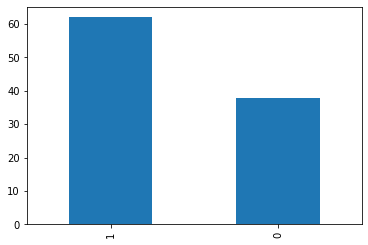

In [7]:
df.diagnosis_result.value_counts()[0:30].plot(kind='bar')
plt.show()

The data distrubution shows that the malignant values are 62, and the benign values are 38.

# Data Preparation

## Correlation matrix

In [8]:
df.corr()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,1.000000,-0.316889,0.047276,0.052263,-0.215953,-0.174354,-0.258328,-0.277554,-0.222334,-0.164946
diagnosis_result,-0.316889,1.000000,-0.176967,0.070735,0.607498,0.562444,0.197616,0.512234,0.233028,0.008180
radius,0.047276,-0.176967,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120
texture,0.052263,0.070735,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157
perimeter,-0.215953,0.607498,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434
area,-0.174354,0.562444,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344
smoothness,-0.258328,0.197616,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580
compactness,-0.277554,0.512234,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953
symmetry,-0.222334,0.233028,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608
fractal_dimension,-0.164946,0.008180,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000


The id, texture, and fractal_dimension shows the lowest effect on the result, so we are droping them.

In [9]:
df_processed = df.drop(["id", "texture","fractal_dimension"], axis=1)
df_processed.head()

,diagnosis_result,radius,perimeter,area,smoothness,compactness,symmetry
0,1,23,151,954,0.143,0.278,0.242
1,0,9,133,1326,0.143,0.079,0.181
2,1,21,130,1203,0.125,0.160,0.207
3,1,14,78,386,0.070,0.284,0.260
4,1,9,135,1297,0.141,0.133,0.181


## Check for duplicates

In [10]:
df_processed.duplicated().sum()

0

No dublicates in the data

## Data Distribution

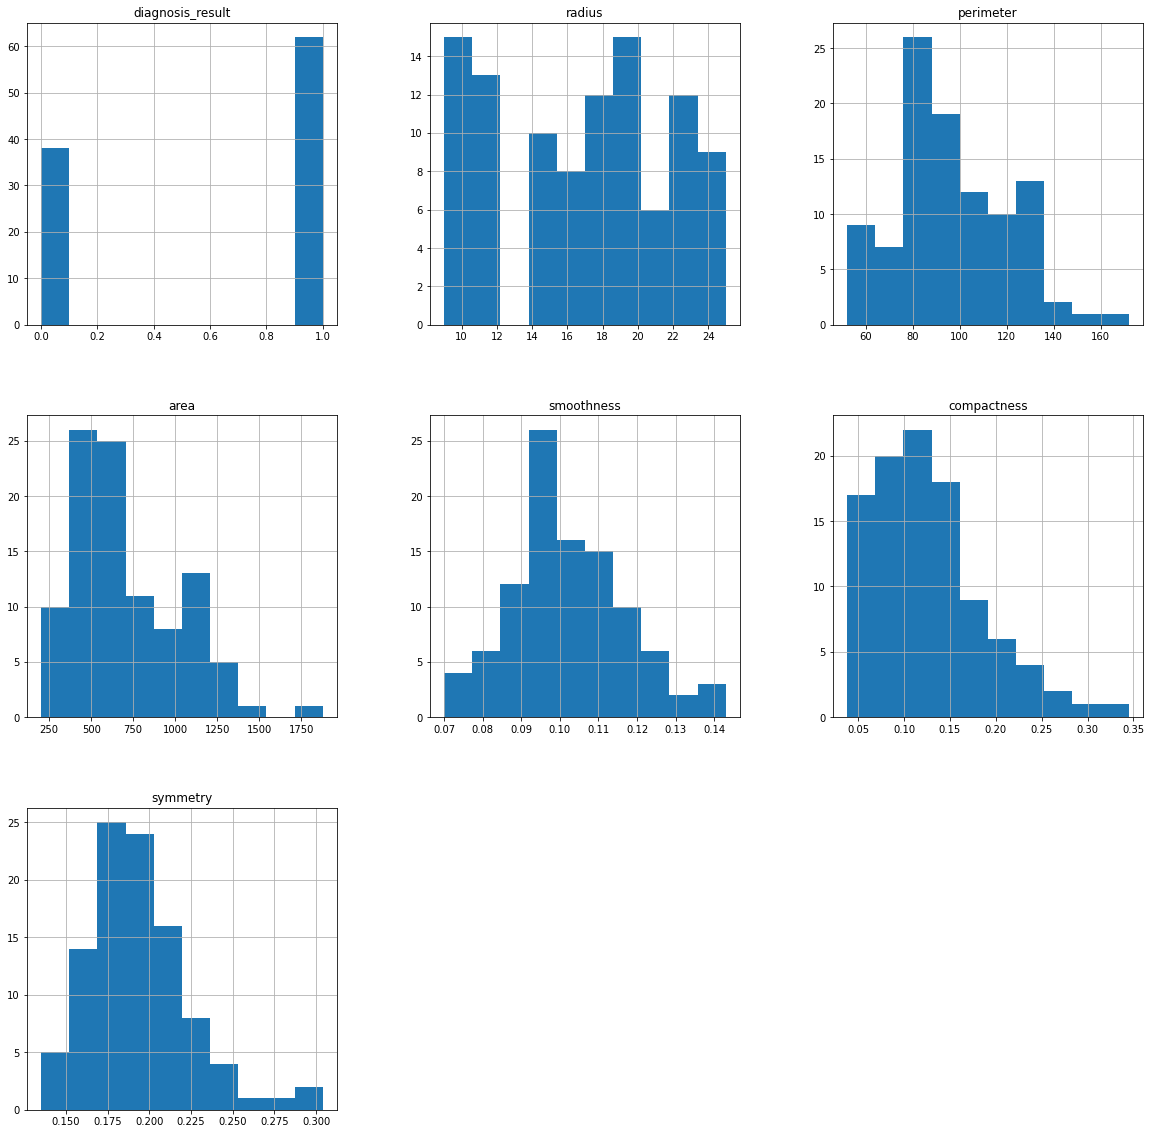

In [11]:
df_processed.hist(figsize = (20,20))

plt.show()

## Outliers

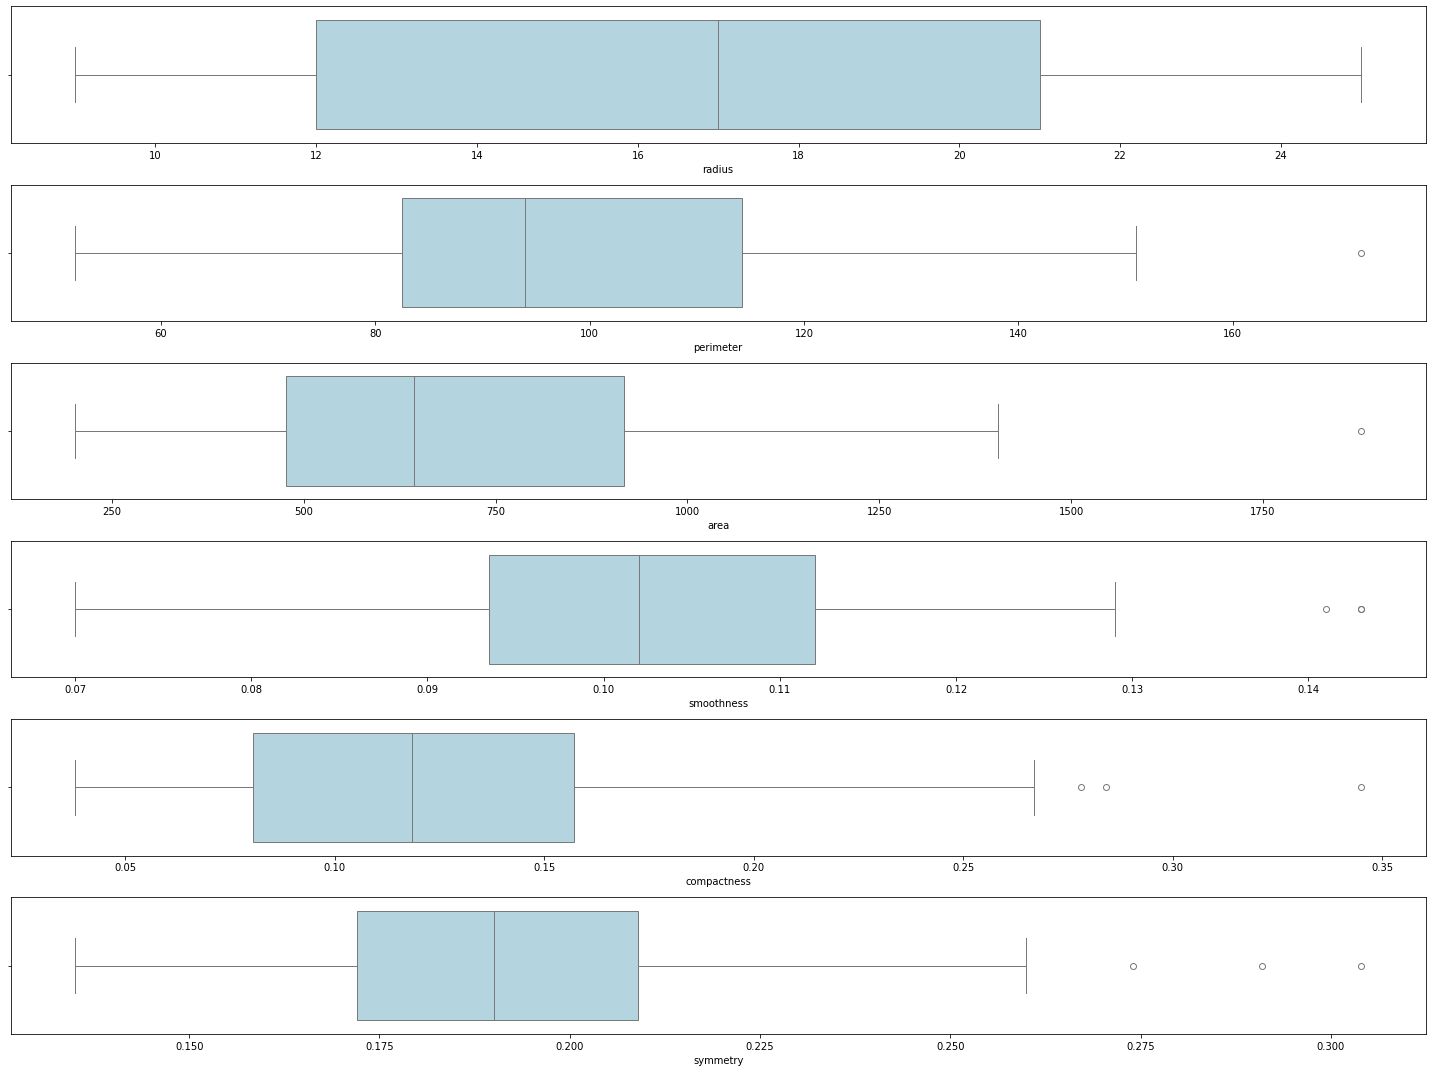

In [12]:
features = ["radius" , "perimeter" , "area" , "smoothness" , "compactness", "symmetry" ]

plt.figure(figsize= (20,15))

for i in range(len(features)):
  
    plt.subplot(len(features),1,i+1)
    sns.boxplot(x= df_processed[features[i]], color='lightblue')
    plt.tight_layout()
    
plt.show()

We can see that there are some outliers in all the feauters except "radius" .

#### Removing outliers

In [13]:
columns_to_test = ["perimeter" , "area" , "smoothness" , "compactness", "symmetry" ]

for i in columns_to_test:
    Q3 = df_processed[i].quantile(.75)
    Q1 = df_processed[i].quantile(.25)
    IQR = Q3 - Q1

    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR

    upper_values = df_processed[i] >  upper_whisker
    lower_values = df_processed[i] <  lower_whisker

    df_processed.loc[upper_values, i] = upper_whisker
    df_processed.loc[lower_values, i] = lower_whisker

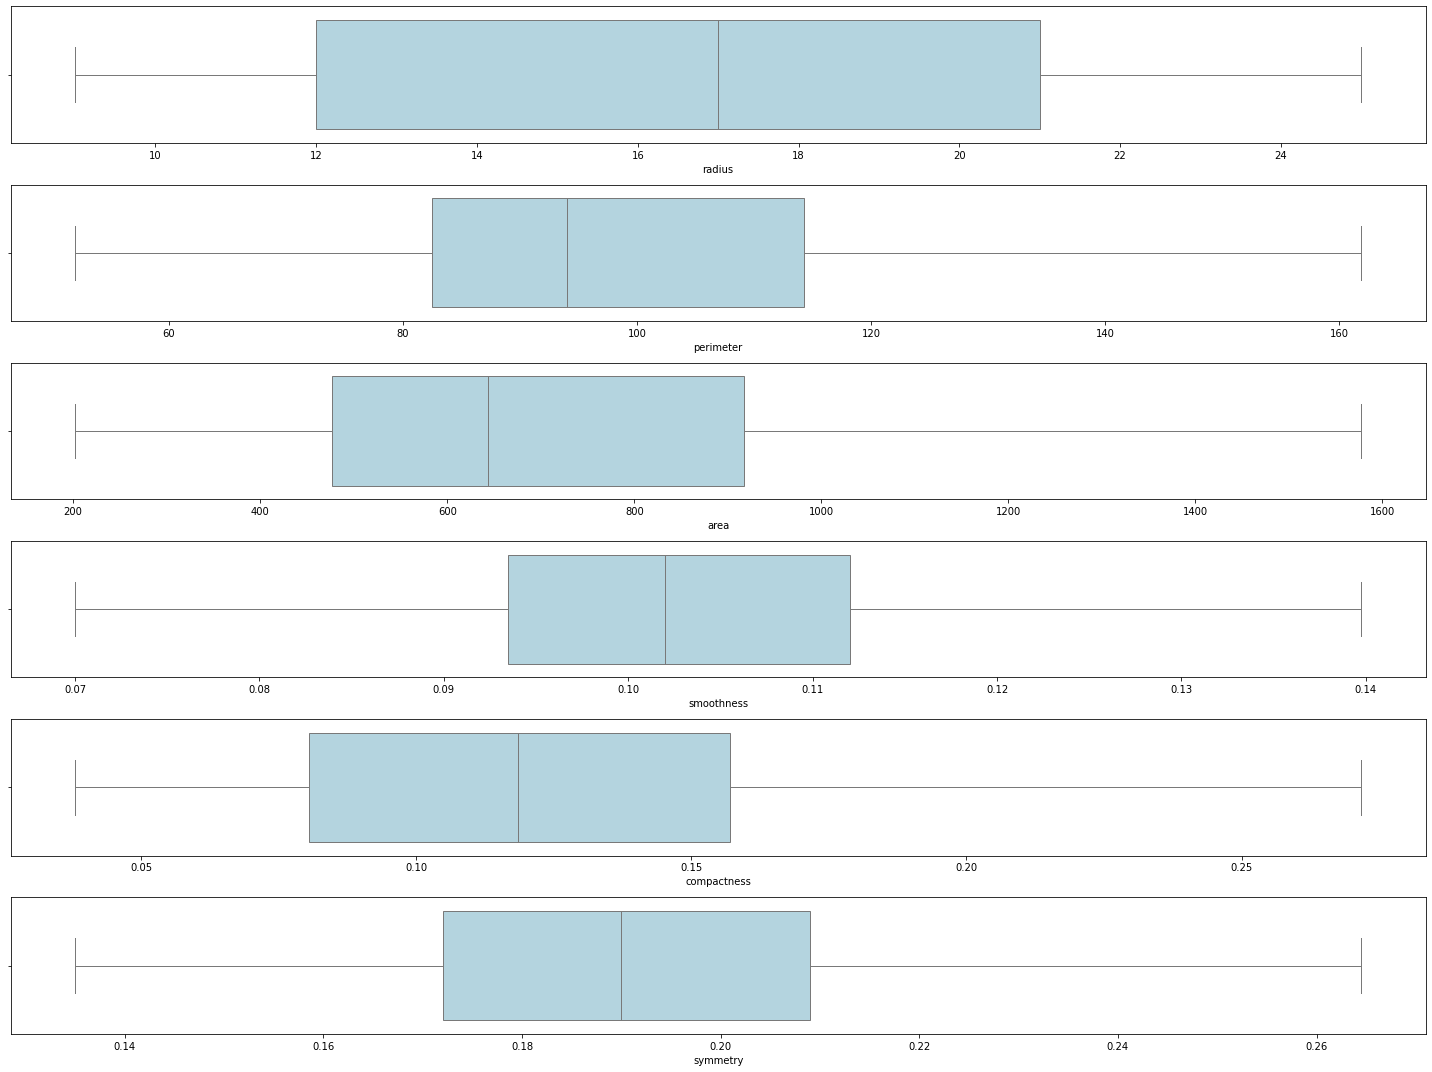

In [14]:
features = ["radius" , "perimeter" , "area" , "smoothness" , "compactness", "symmetry" ]

plt.figure(figsize= (20,15))

for i in range(len(features)):
  
    plt.subplot(len(features),1,i+1)
    sns.boxplot(x= df_processed[features[i]], color='lightblue')
    plt.tight_layout()
    
plt.show()

## Standardization

Standardize the data for better performance and faster convergance.

In [15]:
def standardize_features(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    standardized_X = (X - means) / stds
    return standardized_X


In [16]:

for i in range(len(features)):
    df_processed[features[i]] = standardize_features(df_processed[features[i]])

df_processed.head()


,diagnosis_result,radius,perimeter,area,smoothness,compactness,symmetry
0,1,1.266830,2.336026,0.824398,2.583037,2.511239,1.746086
1,0,-1.617011,1.561956,2.031184,2.583037,-0.804851,-0.401968
2,1,0.854853,1.432944,1.632166,1.556019,0.588681,0.513596
3,1,-0.587068,-0.803259,-1.018222,-2.273539,2.511239,2.379938
4,1,-1.617011,1.647964,1.937107,2.583037,0.124171,-0.401968


# Models

- Implementing KNN and RNN models from.
- Adding callable functions of sklearn and scratch models, its purpose is to fit the model, predict values, and calculate the accuracy. These function prevent code repetition and make it easier to access the model.

## KNN

### 1. Sklearn

In [17]:
def knn_sklearn(X_train, y_train, X_test, y_test, n_neighbors):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    return pred,accuracy

### 2. From scratch

In [18]:
class kNN():
    '''k-Nearest Neighbours'''
    # Initialise
    def __init__(self, k=3):
        self.k = k
    
    # Euclidean distance (l2 norm)
    def euclidean(self, v1, v2):
        try:
            result = np.sqrt(np.sum((v1 - v2) ** 2))
            return result
        except TypeError as e:
            print("Error in euclidean function:")
            print(f"v1: {v1}")
            print(f"v2: {v2}")
            raise e
    
       
    # Store train set
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    # Make predictions
    def predict(self, X_test):
        preds = []
        # Loop over rows in test set
        for test_row in X_test:
            nearest_neighbours = self.get_neighbours(test_row)
            majority = stats.mode(nearest_neighbours)[0][0]
            preds.append(majority)
        return np.array(preds)
    
    # Get nearest neighbours
    def get_neighbours(self, test_row):
        distances = list()
        
        # Calculate distance to all points in X_train
        for (train_row, train_class) in zip(self.X_train, self.y_train):
                dist = self.euclidean(train_row, test_row)
                distances.append((dist, train_class))
            
        # Sort distances
        distances.sort(key=lambda x: x[0])
        
        # Identify k nearest neighbours
        neighbours = list()
        for i in range(self.k):
            neighbours.append(distances[i][1])
            
        return neighbours
    
    def accuracy(self,preds, y_test):
        return 100 * (preds == y_test).mean()

In [19]:
def knn_scratch(X_train, y_train, X_test, y_test, n_neighbors):
    
    clf = kNN(k = n_neighbors)
    clf.fit(X_train.values, y_train.values)
    pred = clf.predict(X_test.values)
    accuracy = clf.accuracy(pred , y_test)
    return pred, accuracy

## RNN

### 1. Sklearn

In [20]:
def rnn_sklearn(X_train, y_train, X_test, y_test, radius):
    clf = RadiusNeighborsClassifier(radius=radius)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    return pred, accuracy

### 2. From Scratch

In [21]:
class RadiusNN():
    '''Radius Nearest Neighbours'''
    # Initialise
    def __init__(self, radius=1.0):
        self.radius = radius

    # Euclidean distance (l2 norm)
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1 - v2) ** 2))
    
    # Store train set
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    # Make predictions
    def predict(self, X_test):
        preds = []
        # Loop over rows in the test set
        for test_row in X_test:
            neighbours = self.get_neighbours(test_row)
            if not neighbours:
                # If no neighbors are found within the radius, assign a default value or handle it accordingly
                preds.append(None)
            else:
                # Use majority voting or another method to determine the predicted class
                majority = stats.mode(neighbours)[0][0]
                preds.append(majority)
        return np.array(preds)
    
    # Get nearest neighbors within the specified radius
    def get_neighbours(self, test_row):
        neighbours = []
        
        # Calculate distance to all points in X_train
        for (train_row, train_class) in zip(self.X_train, self.y_train):
            dist = self.euclidean(train_row, test_row)
            if dist <= self.radius:
                neighbours.append(train_class)
            
        return neighbours
    
    def accuracy(self,preds, y_test):
        return 100 * (preds == y_test).mean()

In [22]:
def rnn_scratch(X_train, y_train, X_test, y_test, radius):
    clf = RadiusNN(radius=radius)
    clf.fit(X_train.values, y_train.values)
    pred = clf.predict(X_test.values)
    accuracy = clf.accuracy(y_test, pred)
    return pred,accuracy

# Confusion Matrix Plotting

In [23]:
def plot_conf_matrix(matrix):
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(matrix, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
    plt.show()

# Accuracy and Confusion Matrix using Original Dataframe

In [24]:
# droping patient id column

df = df.drop(['id'],axis =1 )

In [25]:
X1 = df.drop("diagnosis_result", axis=1)

X1.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


In [26]:
y1 = df['diagnosis_result']

y1.head()

0    1
1    0
2    1
3    1
4    1
Name: diagnosis_result, dtype: int64

In [27]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size= 0.2, random_state=42)

## KNN

### 1. Sklearn

5 neighbors sklearn model accuracy:  75.0
5 neighbors sklearn model confusion matrix:  [[ 2  2]
 [ 3 13]]


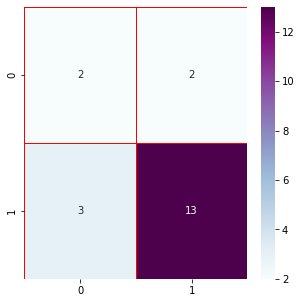

9 neighbors sklearn model accuracy:  70.0
9 neighbors sklearn model confusion matrix:  [[ 2  2]
 [ 4 12]]


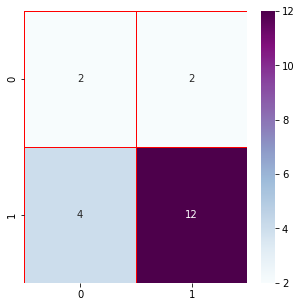

In [28]:
# using 5 neighbors

predictions_5_sklearn1 , accuracy_knn_5_sklearn1 = knn_sklearn(X_train1, y_train1, X_test1, y_test1,5)

conf_matrix_knn_5_sklearn1 = confusion_matrix(y_test1, predictions_5_sklearn1)

print("5 neighbors sklearn model accuracy: ", accuracy_knn_5_sklearn1 * 100)

print("5 neighbors sklearn model confusion matrix: ",conf_matrix_knn_5_sklearn1)

plot_conf_matrix(conf_matrix_knn_5_sklearn1)

#______________________________________________________________#

# using 9 neighbors

predictions_9_sklearn1 ,accuracy_knn_9_sklearn1 = knn_sklearn(X_train1, y_train1, X_test1, y_test1,9)

conf_matrix_knn_9_sklearn1 = confusion_matrix(y_test1, predictions_9_sklearn1)

print("9 neighbors sklearn model accuracy: ", accuracy_knn_9_sklearn1 * 100)

print("9 neighbors sklearn model confusion matrix: ",conf_matrix_knn_9_sklearn1)

plot_conf_matrix(conf_matrix_knn_9_sklearn1)


### 2. From scratch

5 neighbors from scratch model accuracy:  75.0
5 neighbors from scratch model confusion matrix:  [[ 2  2]
 [ 3 13]]


C:\Users\MAI\AppData\Local\Temp\ipykernel_15600\4114452165.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority = stats.mode(nearest_neighbours)[0][0]


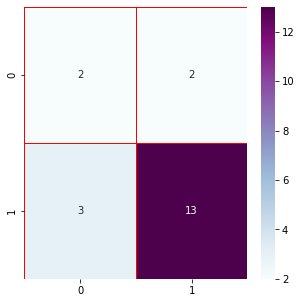

C:\Users\MAI\AppData\Local\Temp\ipykernel_15600\4114452165.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority = stats.mode(nearest_neighbours)[0][0]


9 neighbors from scratch model accuracy:  70.0
9 neighbors from scratch model confusion matrix:  [[ 2  2]
 [ 4 12]]


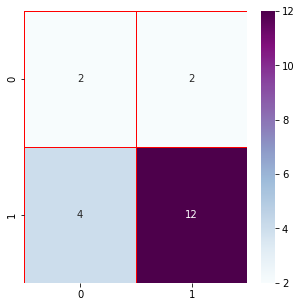

In [29]:
# using 5 neighbors

predictions_5_scratch1 , accuracy_knn_5_scratch1 = knn_scratch(X_train1, y_train1, X_test1, y_test1,5)

conf_matrix_knn_5_scratch1 = confusion_matrix(y_test1, predictions_5_scratch1)

print("5 neighbors from scratch model accuracy: ", accuracy_knn_5_scratch1)

print("5 neighbors from scratch model confusion matrix: ",conf_matrix_knn_5_scratch1)

plot_conf_matrix(conf_matrix_knn_5_scratch1)

#_______________________________________________________#

# using 9 neighbors

predictions_9_scratch1 , accuracy_knn_9_scratch1 = knn_scratch(X_train1, y_train1, X_test1, y_test1,9)

conf_matrix_knn_9_scratch1 = confusion_matrix(y_test1, predictions_9_scratch1)

print("9 neighbors from scratch model accuracy: ", accuracy_knn_9_scratch1)

print("9 neighbors from scratch model confusion matrix: ",conf_matrix_knn_9_scratch1)

plot_conf_matrix(conf_matrix_knn_9_scratch1)



## RNN

### 1. Sklearn

radius 40 sklearn model accuracy:  65.0
radius 40 sklearn model confusion matrix:  [[ 2  2]
 [ 5 11]]


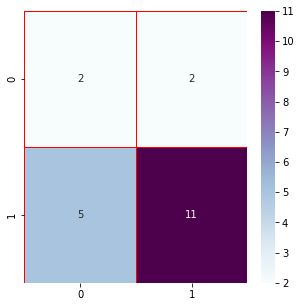

radius 400 sklearn model accuracy:  80.0
radius 400 sklearn model confusion matrix:  [[ 1  3]
 [ 1 15]]


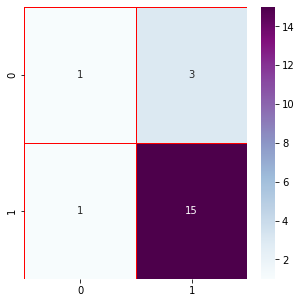

In [30]:
# using radius 40

predictions_rnn_40_sklearn1 , accuracy_rnn_40_sklearn1 = rnn_sklearn(X_train1, y_train1, X_test1, y_test1,40.0)

conf_matrix_rnn_40_sklearn1 = confusion_matrix(y_test1, predictions_rnn_40_sklearn1)

print("radius 40 sklearn model accuracy: ", accuracy_rnn_40_sklearn1 * 100)

print("radius 40 sklearn model confusion matrix: ",conf_matrix_rnn_40_sklearn1)

plot_conf_matrix(conf_matrix_rnn_40_sklearn1)

#______________________________________________________________#

# using radius 400

predictions_rnn_400_sklearn1 ,accuracy_rnn_400_sklearn1 = rnn_sklearn(X_train1, y_train1, X_test1, y_test1,400.0)

conf_matrix_rnn_400_sklearn1 = confusion_matrix(y_test1, predictions_rnn_400_sklearn1)

print("radius 400 sklearn model accuracy: ", accuracy_rnn_400_sklearn1 * 100)

print("radius 400 sklearn model confusion matrix: ",conf_matrix_rnn_400_sklearn1)

plot_conf_matrix(conf_matrix_rnn_400_sklearn1)


### 2. From Scratch

radius 40 from scratch model accuracy:  65.0
radius 40 from scratch model confusion matrix:  [[ 2  2]
 [ 5 11]]


C:\Users\MAI\AppData\Local\Temp\ipykernel_15600\3840006426.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority = stats.mode(neighbours)[0][0]


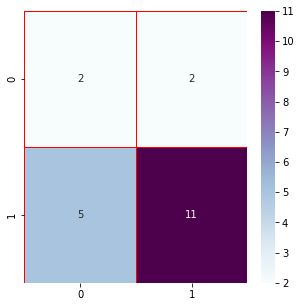

C:\Users\MAI\AppData\Local\Temp\ipykernel_15600\3840006426.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority = stats.mode(neighbours)[0][0]


radius 400 from scratch model accuracy:  80.0
radius 400 from scratch model confusion matrix:  [[ 1  3]
 [ 1 15]]


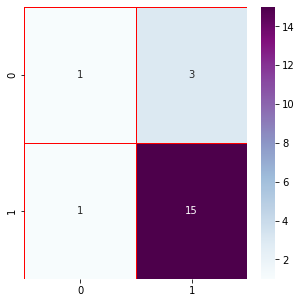

In [31]:
# using radius 40

predictions_rnn_40_scratch1 , accuracy_rnn_40_scratch1 = rnn_scratch(X_train1, y_train1, X_test1, y_test1,40.0)

conf_matrix_rnn_40_scratch1 = confusion_matrix(y_test1, predictions_rnn_40_scratch1)

print("radius 40 from scratch model accuracy: ", accuracy_rnn_40_scratch1)

print("radius 40 from scratch model confusion matrix: ",conf_matrix_rnn_40_scratch1)

plot_conf_matrix(conf_matrix_rnn_40_scratch1)

#______________________________________________________________#

# using radius 400

predictions_rnn_400_scratch1 ,accuracy_rnn_400_scratch1 = rnn_scratch(X_train1, y_train1, X_test1, y_test1,400.0)

conf_matrix_rnn_400_scratch1 = confusion_matrix(y_test1, predictions_rnn_400_scratch1)

print("radius 400 from scratch model accuracy: ", accuracy_rnn_400_scratch1)

print("radius 400 from scratch model confusion matrix: ",conf_matrix_rnn_400_scratch1)

plot_conf_matrix(conf_matrix_rnn_400_scratch1)


# Accuracy and Confusion Matrix Using Proccessed Dataframe

In [32]:
X2 = df_processed.drop("diagnosis_result", axis=1)

X2.head()

,radius,perimeter,area,smoothness,compactness,symmetry
0,1.266830,2.336026,0.824398,2.583037,2.511239,1.746086
1,-1.617011,1.561956,2.031184,2.583037,-0.804851,-0.401968
2,0.854853,1.432944,1.632166,1.556019,0.588681,0.513596
3,-0.587068,-0.803259,-1.018222,-2.273539,2.511239,2.379938
4,-1.617011,1.647964,1.937107,2.583037,0.124171,-0.401968


In [33]:
y2 = df_processed['diagnosis_result']

y2.head()

0    1
1    0
2    1
3    1
4    1
Name: diagnosis_result, dtype: int64

In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size= 0.2, random_state=42)

## KNN

### 1. Sklearn

5 neighbors sklearn model accuracy:  85.0
5 neighbors sklearn model confusion matrix:  [[ 1  3]
 [ 0 16]]


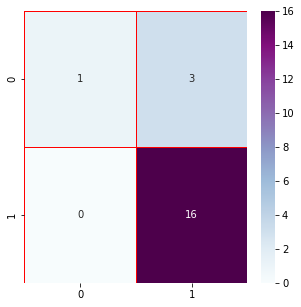

9 neighbors sklearn model accuracy:  80.0
9 neighbors sklearn model confusion matrix:  [[ 2  2]
 [ 2 14]]


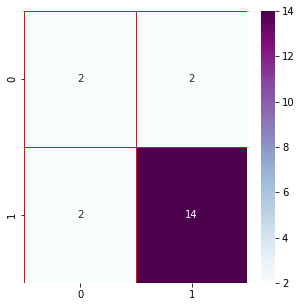

In [35]:
# using 5 neighbors

predictions_5_sklearn2 , accuracy_knn_5_sklearn2 = knn_sklearn(X_train2, y_train2, X_test2, y_test2,5)

conf_matrix_knn_5_sklearn2 = confusion_matrix(y_test2, predictions_5_sklearn2)

print("5 neighbors sklearn model accuracy: ", accuracy_knn_5_sklearn2 * 100)

print("5 neighbors sklearn model confusion matrix: ",conf_matrix_knn_5_sklearn2)

plot_conf_matrix(conf_matrix_knn_5_sklearn2)

#______________________________________________________________#

# using 9 neighbors

predictions_9_sklearn2 ,accuracy_knn_9_sklearn2 = knn_sklearn(X_train2, y_train2, X_test2, y_test2,9)

conf_matrix_knn_9_sklearn2 = confusion_matrix(y_test2, predictions_9_sklearn2)

print("9 neighbors sklearn model accuracy: ", accuracy_knn_9_sklearn2 * 100)

print("9 neighbors sklearn model confusion matrix: ",conf_matrix_knn_9_sklearn2)

plot_conf_matrix(conf_matrix_knn_9_sklearn2)


### 2. From scratch

5 neighbors from scratch model accuracy:  85.0
5 neighbors from scratch model confusion matrix:  [[ 1  3]
 [ 0 16]]


C:\Users\MAI\AppData\Local\Temp\ipykernel_15600\4114452165.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority = stats.mode(nearest_neighbours)[0][0]


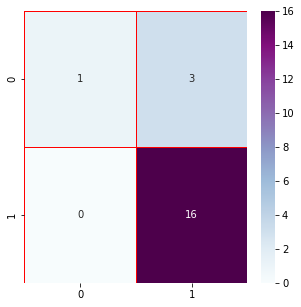

9 neighbors from scratch model accuracy:  80.0
9 neighbors from scratch model confusion matrix:  [[ 2  2]
 [ 2 14]]


C:\Users\MAI\AppData\Local\Temp\ipykernel_15600\4114452165.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority = stats.mode(nearest_neighbours)[0][0]


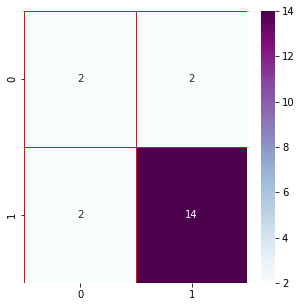

In [36]:
# using 5 neighbors

predictions_5_scratch2 , accuracy_knn_5_scratch2 = knn_scratch(X_train2, y_train2, X_test2, y_test2,5)

conf_matrix_knn_5_scratch2 = confusion_matrix(y_test2, predictions_5_scratch2)

print("5 neighbors from scratch model accuracy: ", accuracy_knn_5_scratch2 )

print("5 neighbors from scratch model confusion matrix: ",conf_matrix_knn_5_scratch2)

plot_conf_matrix(conf_matrix_knn_5_scratch2)

#______________________________________________________________#

# using 9 neighbors

predictions_9_scratch2 ,accuracy_knn_9_scratch2 = knn_scratch(X_train2, y_train2, X_test2, y_test2,9)

conf_matrix_knn_9_scratch2 = confusion_matrix(y_test2, predictions_9_scratch2)

print("9 neighbors from scratch model accuracy: ", accuracy_knn_9_scratch2 )

print("9 neighbors from scratch model confusion matrix: ",conf_matrix_knn_9_scratch2)

plot_conf_matrix(conf_matrix_knn_9_scratch2)


## RNN

### 1. Sklearn

radius 40 sklearn model accuracy:  80.0
radius 40 sklearn model confusion matrix:  [[ 0  4]
 [ 0 16]]


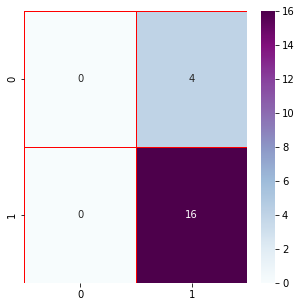

radius 400 sklearn model accuracy:  80.0
radius 400 sklearn model confusion matrix:  [[ 0  4]
 [ 0 16]]


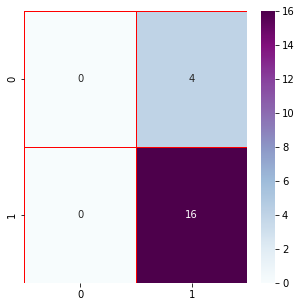

In [37]:
# using radius 40

predictions_rnn_40_sklearn2 , accuracy_rnn_40_sklearn2 = rnn_sklearn(X_train2, y_train2, X_test2, y_test2,40.0)

conf_matrix_rnn_40_sklearn2 = confusion_matrix(y_test2, predictions_rnn_40_sklearn2)

print("radius 40 sklearn model accuracy: ", accuracy_rnn_40_sklearn2 * 100)

print("radius 40 sklearn model confusion matrix: ",conf_matrix_rnn_40_sklearn2)

plot_conf_matrix(conf_matrix_rnn_40_sklearn2)

#______________________________________________________________#

# using radius 400

predictions_rnn_400_sklearn2 ,accuracy_rnn_400_sklearn2 = rnn_sklearn(X_train2, y_train2, X_test2, y_test2,400.0)

conf_matrix_rnn_400_sklearn2 = confusion_matrix(y_test2, predictions_rnn_400_sklearn2)

print("radius 400 sklearn model accuracy: ", accuracy_rnn_400_sklearn2 * 100)

print("radius 400 sklearn model confusion matrix: ",conf_matrix_rnn_400_sklearn2)

plot_conf_matrix(conf_matrix_rnn_400_sklearn2)


### 2. From Scratch

C:\Users\MAI\AppData\Local\Temp\ipykernel_15600\3840006426.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority = stats.mode(neighbours)[0][0]


radius 40 from scratch model accuracy:  80.0
radius 40 from scratch model confusion matrix:  [[ 0  4]
 [ 0 16]]


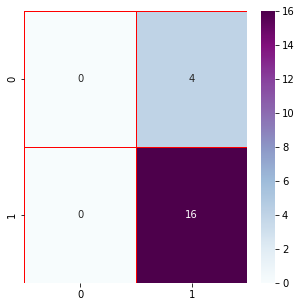

C:\Users\MAI\AppData\Local\Temp\ipykernel_15600\3840006426.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority = stats.mode(neighbours)[0][0]


radius 400 from scratch model accuracy:  80.0
radius 400 from scratch model confusion matrix:  [[ 0  4]
 [ 0 16]]


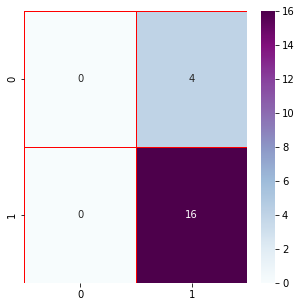

In [38]:
# using radius 40

predictions_rnn_40_scratch2 , accuracy_rnn_40_scratch2 = rnn_scratch(X_train2, y_train2, X_test2, y_test2,40.0)

conf_matrix_rnn_40_scratch2 = confusion_matrix(y_test2, predictions_rnn_40_scratch2)

print("radius 40 from scratch model accuracy: ", accuracy_rnn_40_scratch2)

print("radius 40 from scratch model confusion matrix: ",conf_matrix_rnn_40_scratch2)

plot_conf_matrix(conf_matrix_rnn_40_scratch2)

#______________________________________________________________#

# using radius 400

predictions_rnn_400_scratch2 ,accuracy_rnn_400_scratch2 = rnn_scratch(X_train2, y_train2, X_test2, y_test2,400.0)

conf_matrix_rnn_400_scratch2 = confusion_matrix(y_test2, predictions_rnn_400_scratch2)

print("radius 400 from scratch model accuracy: ", accuracy_rnn_400_scratch2)

print("radius 400 from scratch model confusion matrix: ",conf_matrix_rnn_400_scratch2)

plot_conf_matrix(conf_matrix_rnn_400_scratch2)


# Observations

### For kNN model : 

The accuracy of both sklearn and from scratch models improved with data processing in both number of neighbours.

### For rNN model :

The accuracy with data processing improved only for the small value of radius (40).